# Performance Overview

Using Eric's profiling code, walking through it in a new notebook to make sure I understand it

Here, we will example the performance of coherence (and potentially generalize this) as a function of time on several datasets. These investigations were performed on a 4 core machine (4 threads) with a 3.4 GhZ processor.

***

## Plotting Functions

Constant between the 2 notebooks **jk mostly constant between them**

In [8]:
%matplotlib inline
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import Image, display


def memory_function(infile, dataset):
    with open(infile, 'r') as mem:
        lines = mem.readlines()

    testar = np.asarray([line.strip() for line in lines]).astype(float)/1000
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(0, testar.shape[0]), testar - min(testar), linewidth=5)
    ax.set_ylabel(r'mem use (GB)', fontsize=20)
    ax.set_xlabel(r'Time (s)', fontsize=20)
    ax.set_title(r'%s max = %.2f GB; mean = %.2f GB' % (dataset, max(testar) - np.min(testar), np.mean(testar) - np.min(testar)), fontsize=20)
    fig.set_size_inches(8, 2)
    fig.tight_layout()
    return fig

def cpu_function(infile, dataset):
    with open(infile, 'r') as cpuf:
        lines = cpuf.readlines()

    testar = [re.split(',',line.strip()) for line in lines][0:-1]
    
    corear = np.zeros((len(testar), len(testar[0])))
    print(corear)
    for i in range(0, len(testar)):
        corear[i,:] = np.array([float(cpu) for cpu in testar[i]])
    
    fig=plt.figure()
    ax = fig.add_subplot(111)
    lines = [ax.plot(corear[:,i], '--', label='cpu '+ str(i), 
                     alpha=0.5, linewidth=5)[0] for i in range(0, corear.shape[1])]
    
    total = corear.sum(axis=1)
    lines.append(ax.plot(total, label='all cores')[0])
    
    labels = [h.get_label() for h in lines]
    
#     fig.legend(handles=lines, labels=labels, loc='lower center', prop={'size':20},ncol=2, bbox_to_anchor=(0.5, -.14))
    fig.legend(loc='lower center', prop={'size':10},ncol=2, bbox_to_anchor=(1.15, 0.25))
    ax.set_ylabel('CPU use (%)', fontsize=20)
    ax.set_ylim([0, 110])
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_title('%s max = %.1f; mean = %.1f' % (dataset, max(total), np.mean(total)), fontsize=20)
    fig.set_size_inches(8, 2)
    fig.tight_layout()
    return fig

def disk_function(infile, dataset):
    with open(infile, 'r') as disk:
        lines = disk.readlines()

    testar = np.asarray([line.strip() for line in lines]).astype(float)/1000000

    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(0, testar.shape[0]), testar - min(testar))
    ax.set_ylabel('Disk usage GB')
    ax.set_xlabel('Time (30 s)')
    ax.set_title('%s max = %.2f GB; mean = %.2f GB' % (dataset, max(testar) - np.min(testar), np.mean(testar) - np.min(testar)))
    return fig


## Logging Functions

In [1]:
%%script false

## disklog.sh
#!/bin/bash -e
# run this in the background with nohup ./disklog.sh > disk.txt &
#
while true; do
    echo "$(du -s $1 | awk '{print $1}')"
    sleep 30
done



## Control Plots

[ 3.068  3.093  3.093  3.093  3.093  3.116  3.116  3.116  3.116  3.124
  3.076  3.068  3.068  3.093  3.094  3.093  3.093  3.117  3.116  3.116
  3.116  3.127  3.078  3.07   3.069  3.093  3.092  3.092  3.092  3.116
  3.116  3.116  3.116  3.124  3.075  3.07   3.068  3.094  3.093  3.093
  3.091  3.116  3.116  3.116  3.116  3.125  3.078  3.071  3.072  3.097
  3.096  3.097  3.096  3.118  3.119  3.119  3.118  3.126  3.077  3.064
  3.065  3.087  3.088  3.088  3.089  3.113  3.113  3.112  3.113  3.121
  3.066  3.065  3.065  3.09   3.09   3.093  3.091  3.114  3.114  3.115
  3.114  3.126  3.066  3.055  3.057]


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


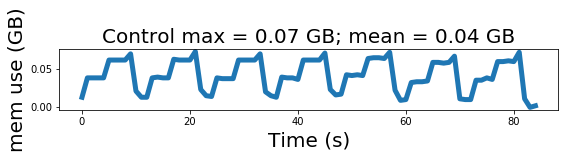

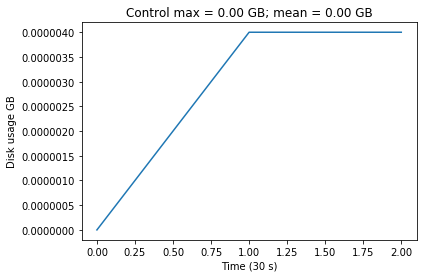

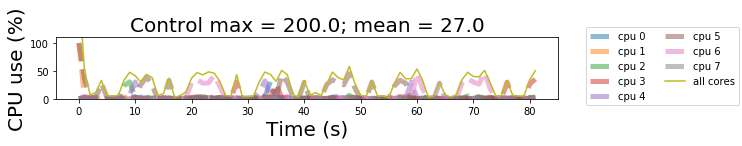

In [47]:
title = 'Control'
memfig = memory_function('../../../code/scripts/mem.txt', title)
diskfig = disk_function('../../../code/scripts/disk.txt', title)
cpufig = cpu_function('../../../code/scripts/cpupy.txt', title)
memfig.show()
diskfig.show()
cpufig.show()


## Putting it together on Coherence, single core first
Profile coherence code

In [3]:
profiles_path = '../../../data/test_profiles/'

In [49]:
%%script false

## coherence.sh
# A function for generating memory and cpu summaries for fngs pipeline.
#
# Usage: ./generate_statistics.sh /path/to/rest /path/to/anat /path/to/output

./memlog.sh > ${3}/mem.txt &
memkey=$!
python cpulog.py ${3}/cpu.txt &
cpukey=$!
./disklog.sh $3 > ${3}/disk.txt &
diskkey=$!

python coherence_single.py

kill $memkey $cpukey $diskkey

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


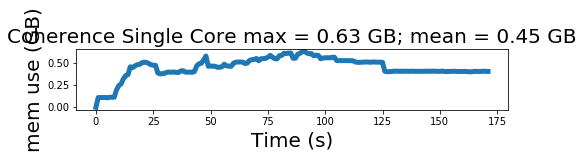

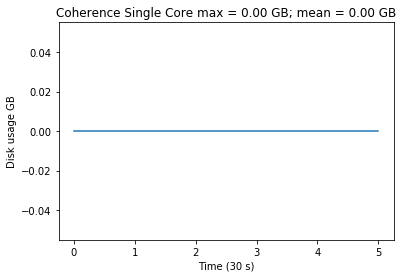

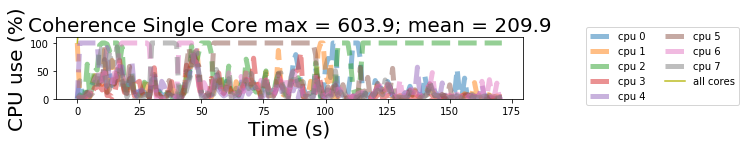

In [4]:
title = 'Coherence Single Core'
memfig = memory_function(profiles_path + 'coh_sing_mem.txt', title)
diskfig = disk_function(profiles_path + 'coh_sing_disk.txt', title)
cpufig = cpu_function(profiles_path + 'coh_sing_cpu.txt', title)
memfig.show()
diskfig.show()
cpufig.show()


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


ValueError: could not broadcast input array from shape (2) into shape (8)

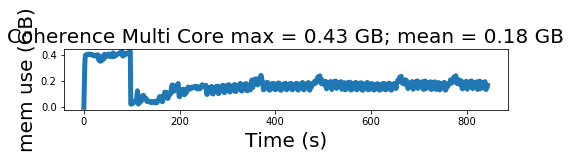

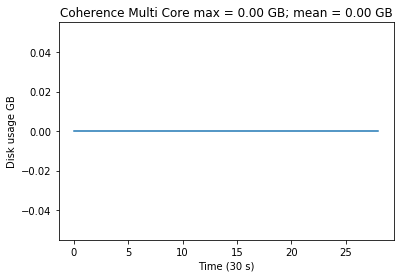

In [9]:
title = 'Coherence Multi Core'
memfig = memory_function(profiles_path + 'coh_multi_mem.txt', title)
diskfig = disk_function(profiles_path + 'coh_multi_disk.txt', title)
cpufig = cpu_function(profiles_path + 'coh_multi_cpu.txt', title)
memfig.show()
diskfig.show()
cpufig.show()
